## Module 3

In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

N = 50                                
x_start, x_end = -2.0, 2.0            
y_start, y_end = -1.0, 1.0            
x = numpy.linspace(x_start, x_end, N)   
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y) 


## 3.1 Source near a plane wall


In [2]:
class Source:
   
    def __init__(self, strength, x, y):
        
        self.strength = strength
        self.x, self.y = x, y
    
    def velocity(self, X, Y):
        
        u = (self.strength / (2 * math.pi) *
             (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        v = (self.strength / (2 * math.pi) *
             (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        return u, v
    
    def stream_function(self, X, Y):
        
        psi = (self.strength / (2 * math.pi) *
               numpy.arctan2((Y - self.y), (X - self.x)))
        return psi
    

In [26]:
#Defining the source 
strength_source = 1.0                          
x_source, y_source = 0.0, 0.5        
source = Source(strength_source, x_source, y_source)

#calculating its velocity and stream function
u1, v1 = source.velocity(X, Y)
psi1 = source.stream_function(X, Y)

#defining the image of the source and its velocity
source_image = Source(strength_source, x_source, -y_source)
u2, v2 = source_image.velocity(X, Y)
psi2 = source_image.stream_function(X, Y)


In [27]:
def plot_streamline(X,Y,u,v,psi,source,source_image,title):
    width = 10
    height = (y_end - y_start) / (x_end - x_start) * width
    pyplot.figure(figsize=(width, height))
    pyplot.xlabel('x', fontsize=16)
    pyplot.ylabel('y', fontsize=16)
    pyplot.xlim(x_start, x_end)
    pyplot.ylim(y_start, y_end)
    pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
    pyplot.title(title)
    pyplot.scatter(source.x, source.y, color='#CD2305', s=80, marker='o')
    pyplot.scatter(source_image.x, source_image.y, color='#CD2305', s=80, marker='D')
    pyplot.axhline(0., color='k', linestyle='--', linewidth=4);


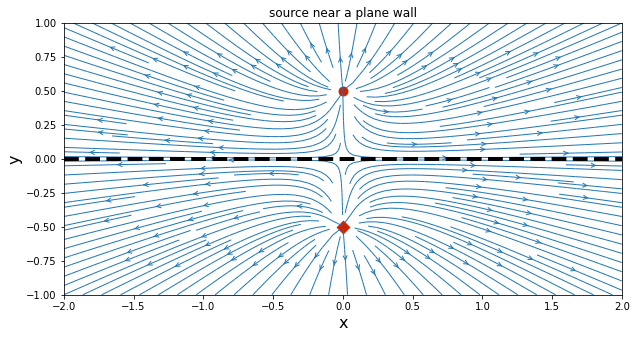

In [29]:
# superposition of the source and its image
u = u1 + u2
v = v1 + v2
psi = psi1 + psi2

# plot the streamlines
plot_streamline(X,Y,u,v,psi,source,source_image,'source near a plane wall')


## Vortex near a plane

In [31]:
class Vortex:
    
    def __init__(self, strength, x, y):
       
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        
        u = (+self.strength / (2 * math.pi) *
             (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        v = (-self.strength / (2 * math.pi) *
             (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        return u, v
        
    def stream_function(self, X, Y):
       
        psi = (-self.strength / (4 * math.pi) *
               numpy.log((X - self.x)**2 + (Y - self.y)**2))
        return psi
    

In [32]:
strength_vortex = 1.0                 
x_vortex, y_vortex = 0.0, 0.5          

# defining a vortex
vortex = Vortex(strength_vortex, x_vortex, y_vortex)
u1, v1 = vortex.velocity(X, Y)
psi1 = vortex.stream_function(X, Y)

# defining the image of the vortex
vortex_image = Vortex(-strength_vortex, x_vortex, -y_vortex)
u2, v2 = vortex_image.velocity(X, Y)
psi2 = vortex_image.stream_function(X, Y)


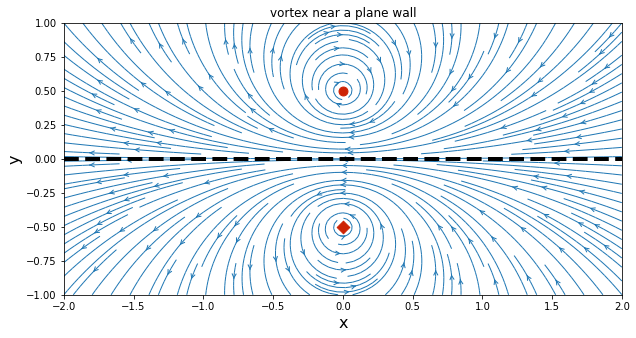

In [33]:
# superposition of the vortex and its image
u = u1 + u2
v = v1 + v2
psi = psi1 + psi2


plot_streamline(X,Y,u,v,psi,vortex,vortex_image,'vortex near a plane wall')


##  Motion of Vortex pair near the ground

In [34]:
strength_vortex = 1.0                  
x_vortex1, y_vortex1 = -0.1, 0.5       # location of the first vortex
x_vortex2, y_vortex2 = +0.1, 0.5       # location of the second vortex

# create two vortices at different locations
vortex1 = Vortex(+strength_vortex, x_vortex1, y_vortex1)
vortex2 = Vortex(-strength_vortex, x_vortex2, y_vortex2)

# compute the velocity and stream-function for each vortex
u1, v1 = vortex1.velocity(X, Y)
psi1 = vortex1.stream_function(X, Y)
u2, v2 = vortex2.velocity(X, Y)
psi2 = vortex2.stream_function(X, Y)

# create an image for each vortex
vortex1_image = Vortex(-strength_vortex, x_vortex1, -y_vortex1)
vortex2_image = Vortex(+strength_vortex, x_vortex2, -y_vortex2)

# compute the velcoity and stream-function of each image
u3, v3 = vortex1_image.velocity(X, Y)
psi3 = vortex1_image.stream_function(X, Y)
u4, v4 = vortex2_image.velocity(X, Y)
psi4 = vortex2_image.stream_function(X, Y)


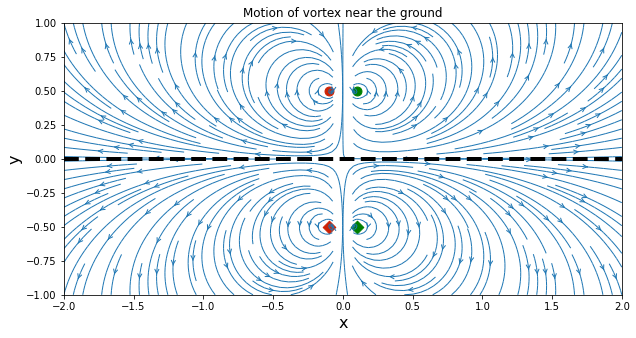

In [35]:
u = u1 + u2 + u3 + u4
v = v1 + v2 + v3 + v4
psi = psi1 + psi2 + psi3 + psi4

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex1.x, vortex1.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex2.x, vortex2.y, color='g', s=80, marker='o')
pyplot.title('Motion of vortex near the ground')
pyplot.scatter(vortex1_image.x, vortex1_image.y, color='#CD2305', s=80, marker='D')
pyplot.scatter(vortex2_image.x, vortex2_image.y, color='g', s=80, marker='D')
pyplot.axhline(0.0, color='k', linestyle='--', linewidth=4);


## Doublet near a plane wall

In [36]:
u_inf = 1.0    # free-stream speed

# calculate the velocity and stream-function of the free-stream flow
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y


In [37]:
class Doublet:
    
    def __init__(self, strength, x, y):
       
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
       
        u = (-self.strength / (2 * math.pi) *
             ((X - self.x)**2 - (Y - self.y)**2) /
             ((X - self.x)**2 + (Y - self.y)**2)**2)
        v = (-self.strength / (2 * math.pi) *
             2 * (X - self.x) * (Y - self.y) /
             ((X - self.x)**2 + (Y - self.y)**2)**2)
        return u, v
            
    def stream_function(self, X, Y):
       
        psi = (-self.strength / (2 * math.pi) *
               (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        return psi
    

In [38]:
strength_doublet = 1.0                # strength of the doublet
x_doublet, y_doublet = 0.0, 0.3       # location of the doublet

# create a doublet (object of class Doublet)
doublet = Doublet(strength_doublet, x_doublet, y_doublet)

# compute the velocity and stream-function of the doublet on the mesh
u1, v1 = doublet.velocity(X, Y)
psi1 = doublet.stream_function(X, Y)

# create the image of the doublet
doublet_image = Doublet(strength_doublet, x_doublet, -y_doublet)

# compute the velocity and stream-function of the image on the mesh
u2, v2 = doublet_image.velocity(X, Y)
psi2 = doublet_image.stream_function(X, Y)


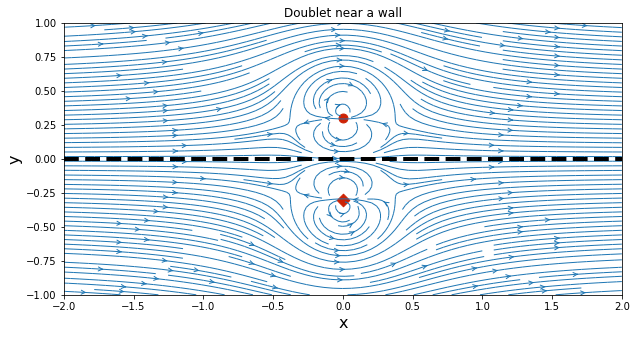

In [39]:
# superposition of the doublet and its image to the uniform flow
u = u_freestream + u1 + u2
v = v_freestream + v1 + v2
psi = psi_freestream + psi1 + psi2

plot_streamline(X,Y,u,v,psi,doublet,doublet_image,'Doublet near a wall')


## Module 3.2 (Method of Images)

In [41]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline


N = 100                               
x_start, x_end = -1.0, 1.0           
y_start, y_end = -1.5, 1.5            
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y) 


In [42]:
u_inf = 1.0     # free-stream speed

# calculate the free-stream velocity components
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)


In [43]:
class Source:
    
    def __init__(self, strength, x, y):
        
        self.strength = strength
        self.x, self.y = x, y

    def velocity(self, X, Y):
       
        u = (self.strength / (2 * math.pi) *
             (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        v = (self.strength / (2 * math.pi) *
             (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        return u, v

    def stream_function(self, X, Y):
        
        psi = (self.strength / (2 * math.pi) *
               numpy.arctan2((Y - self.y), (X - self.x)))
        return psi
    

In [44]:
N_sources = 11                                # number of sources
strength = 5.0                                # sum of all source strengths
strength_source = strength / N_sources        # strength of one source
x_source = numpy.zeros(N_sources, dtype=float)   # horizontal position of all sources (1D array)
y_source = numpy.linspace(-1.0, 1.0, N_sources)  # vertical position of all sources (1D array)

# create a source line (Numpy array of Source objects)
sources = numpy.empty(N_sources, dtype=object)
for i in range(N_sources):
    sources[i] = Source(strength_source, x_source[i], y_source[i])

# superposition of all sources to the free-stream flow
u = u_freestream.copy()
v = v_freestream.copy()
for source in sources:
    us, vs = source.velocity(X, Y)
    u += us
    v += vs
    

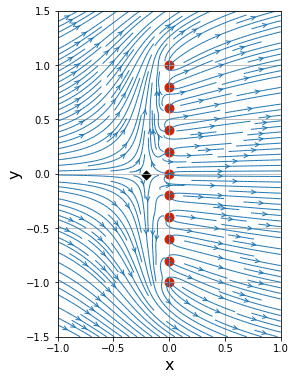

In [45]:
width = 4
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
# plot the sources
pyplot.scatter(x_source, y_source,
               color='#CD2305', s=80, marker='o')
# compute the velocity magniture and indices of the stagnation point
# note: the stagnation point is approximated as the point with the smallest velocity magnitude
magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)
# plot the stagnation point
pyplot.scatter(x[i_stagn], y[j_stagn],
               color='black', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);


In [46]:
from scipy import integrate

sigma = 2.5    # strength of the source-sheet

# boundaries of the source-sheet
y_min, y_max = -1.0, 1.0

# create the anonymous functions
integrand_u = lambda s, x, y: x / (x**2 + (y - s)**2)
integrand_v = lambda s, x, y: (y - s) / (x**2 + (y - s)**2)

# create a dummy function to vectorize
def integration(x, y, integrand):
    return integrate.quad(integrand, y_min, y_max, args=(x, y))[0]

vec_integration = numpy.vectorize(integration)

# compute the velocity field generated by the source-sheet
u_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_v)

# superposition of the source-sheet to the uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet


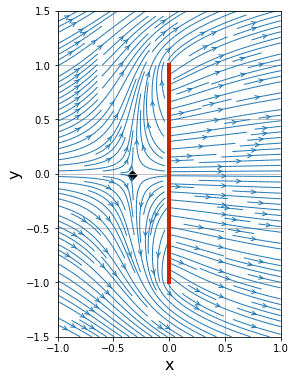

In [47]:
width = 4
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
# plot the source sheet
pyplot.axvline(0.0,
               (y_min - y_start) / (y_end - y_start),
               (y_max - y_start) / (y_end - y_start),
               color='#CD2305', linewidth=4)
# compute the velocity magniture and indices of the stagnation point
# note: stagnation point approximated as point with smallest velocity magnitude
magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)
# plot the stagnation point
pyplot.scatter(x[i_stagn], y[j_stagn],
               color='black', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);


## Module - 3.3 (Flow over a cylinder using source panel)

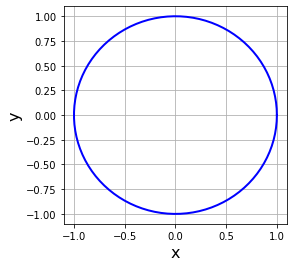

In [48]:
import math
import numpy
from scipy import integrate
from matplotlib import pyplot
%matplotlib inline

u_inf = 1.0 

# define the cylinder of untit radius centered at (0, 0)
R = 1.0
x_center, y_center = 0.0, 0.0
theta = numpy.linspace(0.0, 2 * math.pi, 100)
x_cylinder, y_cylinder = (x_center + R * numpy.cos(theta),
                          y_center + R * numpy.sin(theta))
# plot the cylinder
size = 4
pyplot.figure(figsize=(size, size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_cylinder, y_cylinder, color='b', linestyle='-', linewidth=2)
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-1.1, 1.1);


In [49]:
class Panel:
   
    def __init__(self, xa, ya, xb, yb):
        
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        
        self.xc, self.yc = (xa + xb) / 2, (ya + yb) / 2  # control-point (center-point)
        self.length = math.sqrt((xb - xa)**2 + (yb - ya)**2)  # length of the panel
        
        # orientation of the panel (angle between x-axis and panel's normal)
        if xb - xa <= 0.:
            self.beta = math.acos((yb - ya) / self.length)
        elif xb - xa > 0.:
            self.beta = math.pi + math.acos(-(yb - ya) / self.length)
        
        self.sigma = 0.0  # source strength
        self.vt = 0.0  # tangential velocity
        self.cp = 0.0  # pressure coefficient
        

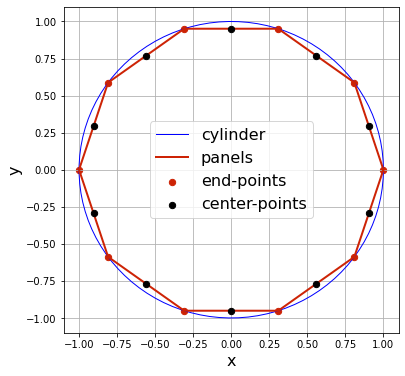

In [50]:
N_panels = 10  # number of panels desired

# define the end-points of the panels
x_ends = R * numpy.cos(numpy.linspace(0.0, 2 * math.pi, N_panels + 1))
y_ends = R * numpy.sin(numpy.linspace(0.0, 2 * math.pi, N_panels + 1))

# define the panels
panels = numpy.empty(N_panels, dtype=object)
for i in range(N_panels):
    panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i + 1], y_ends[i + 1])
    
# plot the panels
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_cylinder, y_cylinder,
            label='cylinder',
            color='b', linestyle='-', linewidth=1)
pyplot.plot(x_ends, y_ends,
            label='panels',
            color='#CD2305', linestyle='-', linewidth=2)
pyplot.scatter([p.xa for p in panels], [p.ya for p in panels],
               label='end-points',
               color='#CD2305', s=40)
pyplot.scatter([p.xc for p in panels], [p.yc for p in panels],
               label='center-points',
               color='k', s=40, zorder=3)
pyplot.legend(loc='best', prop={'size':16})
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-1.1, 1.1);


In [51]:
def integral_normal(p_i, p_j):
    
    def integrand(s):
        return (((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s)) * math.cos(p_i.beta) +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s)) * math.sin(p_i.beta)) /
                ((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s))**2 +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s))**2))
    return integrate.quad(integrand, 0.0, p_j.length)[0]


In [52]:
# compute the source influence matrix
A = numpy.empty((N_panels, N_panels), dtype=float)
numpy.fill_diagonal(A, 0.5)

for i, p_i in enumerate(panels):
    for j, p_j in enumerate(panels):
        if i != j:
            A[i, j] = 0.5 / math.pi * integral_normal(p_i, p_j)

# compute the RHS of the linear system
b = - u_inf * numpy.cos([p.beta for p in panels])


In [53]:
# solve the linear system
sigma = numpy.linalg.solve(A, b)

for i, panel in enumerate(panels):
    panel.sigma = sigma[i]
    

In [54]:
def integral_tangential(p_i, p_j):
    
    def integrand(s):
        return ((-(p_i.xc - (p_j.xa - math.sin(p_j.beta) * s)) * math.sin(p_i.beta) +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s)) * math.cos(p_i.beta)) /
                ((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s))**2 +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s))**2))
    return integrate.quad(integrand, 0.0, p_j.length)[0]


In [55]:
# compute the matrix of the linear system
A = numpy.empty((N_panels, N_panels), dtype=float)
numpy.fill_diagonal(A, 0.0)

for i, p_i in enumerate(panels):
    for j, p_j in enumerate(panels):
        if i != j:
            A[i, j] = 0.5 / math.pi * integral_tangential(p_i, p_j)

# compute the RHS of the linear system
b = - u_inf * numpy.sin([panel.beta for panel in panels])

# compute the tangential velocity at each panel center-point
vt = numpy.dot(A, sigma) + b

for i, panel in enumerate(panels):
    panel.vt = vt[i]
    

In [56]:
# calculate the surface pressure coefficient
for panel in panels:
    panel.cp = 1.0 - (panel.vt / u_inf)**2


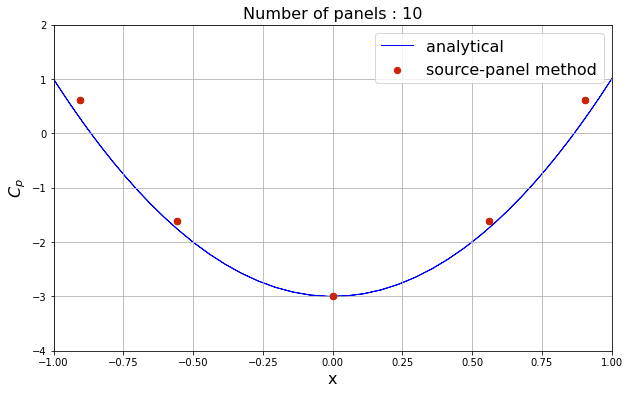

In [57]:
# calculate the analytical surface pressure coefficient
cp_analytical = 1.0 - 4 * (y_cylinder / R)**2

# plot the surface pressure coefficient
pyplot.figure(figsize=(10, 6))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
pyplot.plot(x_cylinder, cp_analytical,
            label='analytical',
            color='b', linestyle='-', linewidth=1, zorder=1)
pyplot.scatter([p.xc for p in panels], [p.cp for p in panels],
               label='source-panel method',
               color='#CD2305', s=40, zorder=2)
pyplot.title('Number of panels : %d' % N_panels, fontsize=16)
pyplot.legend(loc='best', prop={'size':16})
pyplot.xlim(-1.0, 1.0)
pyplot.ylim(-4.0, 2.0);


## Module 3.4 (Source Panel Method)

/home/saksham/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


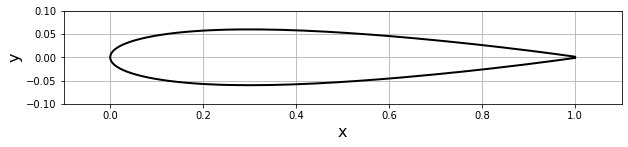

In [1]:
import os
import math
import numpy
from scipy import integrate
from matplotlib import pyplot
%matplotlib inline


# read of the geometry from a data file
naca_filepath = os.path.join('naca0012.dat')
with open (naca_filepath, 'r') as file_name:
    x, y = numpy.loadtxt(file_name, dtype=float, delimiter='\t', unpack=True)

# plot the geometry
width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x, y, color='k', linestyle='-', linewidth=2)
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(-0.1, 0.1);



In [2]:
class Panel:
    
    def __init__(self, xa, ya, xb, yb):
       
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        
        self.xc, self.yc = (xa + xb) / 2, (ya + yb) / 2  # control-point (center-point)
        self.length = math.sqrt((xb - xa)**2 + (yb - ya)**2)  # length of the panel
        
        # orientation of the panel (angle between x-axis and panel's normal)
        if xb - xa <= 0.0:
            self.beta = math.acos((yb - ya) / self.length)
        elif xb - xa > 0.0:
            self.beta = math.pi + math.acos(-(yb - ya) / self.length)
        
        # location of the panel
        if self.beta <= math.pi:
            self.loc = 'upper'
        else:
            self.loc = 'lower'
        
        self.sigma = 0.0  # source strength
        self.vt = 0.0  # tangential velocity
        self.cp = 0.0  # pressure coefficient
        

In [3]:
def define_panels(x, y, N=40):
   
    R = (x.max() - x.min()) / 2  # radius of the circle
    x_center = (x.max() + x.min()) / 2  # x-coord of the center
    # define x-coord of the circle points
    x_circle = x_center + R * numpy.cos(numpy.linspace(0.0, 2 * math.pi, N + 1))
    
    x_ends = numpy.copy(x_circle)  # projection of the x-coord on the surface
    y_ends = numpy.empty_like(x_ends)  # initialization of the y-coord Numpy array

    x, y = numpy.append(x, x[0]), numpy.append(y, y[0])  # extend arrays using numpy.append
    
    # computes the y-coordinate of end-points
    I = 0
    for i in range(N):
        while I < len(x) - 1:
            if (x[I] <= x_ends[i] <= x[I + 1]) or (x[I + 1] <= x_ends[i] <= x[I]):
                break
            else:
                I += 1
        a = (y[I + 1] - y[I]) / (x[I + 1] - x[I])
        b = y[I + 1] - a * x[I + 1]
        y_ends[i] = a * x_ends[i] + b
    y_ends[N] = y_ends[0]
    
    panels = numpy.empty(N, dtype=object)
    for i in range(N):
        panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i + 1], y_ends[i + 1])
    
    return panels


/home/saksham/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


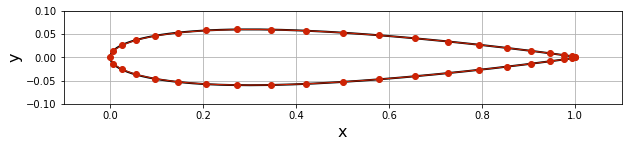

In [4]:
N = 40                           # number of panels
panels = define_panels(x, y, N)  # discretizes of the geometry into panels

# plot the geometry and the panels
width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x, y, color='k', linestyle='-', linewidth=2)
pyplot.plot(numpy.append([panel.xa for panel in panels], panels[0].xa),
            numpy.append([panel.ya for panel in panels], panels[0].ya),
            linestyle='-', linewidth=1, marker='o', markersize=6, color='#CD2305')
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(-0.1, 0.1);


In [27]:
class Freestream:
   
    def __init__(self, u_inf=1.0, alpha=0.0):
        
        self.u_inf = u_inf
        self.alpha = numpy.radians(alpha)
        
u_inf = 1.0                            # freestream spee
alpha = 0.0                            # angle of attack (in degrees)
freestream = Freestream(u_inf, alpha) 


In [28]:
def integral(x, y, panel, dxdz, dydz):
   
    def integrand(s):
        return (((x - (panel.xa - math.sin(panel.beta) * s)) * dxdz +
                 (y - (panel.ya + math.cos(panel.beta) * s)) * dydz) /
                ((x - (panel.xa - math.sin(panel.beta) * s))**2 +
                 (y - (panel.ya + math.cos(panel.beta) * s))**2) )
    return integrate.quad(integrand, 0.0, panel.length)[0]


In [29]:
def build_matrix(panels):
    
    N = len(panels)
    A = numpy.empty((N, N), dtype=float)
    numpy.fill_diagonal(A, 0.5)
    
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A[i, j] = 0.5 / math.pi * integral(p_i.xc, p_i.yc, p_j,
                                                   math.cos(p_i.beta),
                                                   math.sin(p_i.beta))
    
    return A

def build_rhs(panels, freestream):
    
    b = numpy.empty(len(panels), dtype=float)
    
    for i, panel in enumerate(panels):
        b[i] = -freestream.u_inf * math.cos(freestream.alpha - panel.beta)
    
    return b


In [30]:
A = build_matrix(panels)           # compute the singularity matrix
b = build_rhs(panels, freestream)

sigma = numpy.linalg.solve(A, b)

for i, panel in enumerate(panels):
    panel.sigma = sigma[i]
    

In [31]:
def get_tangential_velocity(panels, freestream):
    
    N = len(panels)
    A = numpy.empty((N, N), dtype=float)
    numpy.fill_diagonal(A, 0.0)
    
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A[i, j] = 0.5 / math.pi * integral(p_i.xc, p_i.yc, p_j,
                                                   -math.sin(p_i.beta),
                                                   math.cos(p_i.beta))
    
    b = freestream.u_inf * numpy.sin([freestream.alpha - panel.beta 
                                      for panel in panels])
    
    sigma = numpy.array([panel.sigma for panel in panels])
    
    vt = numpy.dot(A, sigma) + b
    
    for i, panel in enumerate(panels):
        panel.vt = vt[i]
        

In [32]:
get_tangential_velocity(panels, freestream)

def get_pressure_coefficient(panels, freestream):
    
    for panel in panels:
        panel.cp = 1.0 - (panel.vt / freestream.u_inf)**2
        
get_pressure_coefficient(panels, freestream)


In [33]:
voverVsquared=numpy.array([0.0, 0.64, 1.01, 1.241, 1.378, 1.402, 1.411, 1.411,
                           1.399, 1.378, 1.35, 1.288, 1.228, 1.166, 1.109, 1.044,
                           0.956, 0.906, 0.0])
xtheo=numpy.array([0.0, 0.5, 1.25, 2.5, 5.0, 7.5, 10.0, 15.0, 20.0, 25.0, 30.0,
                   40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 100.0])
xtheo /= 100


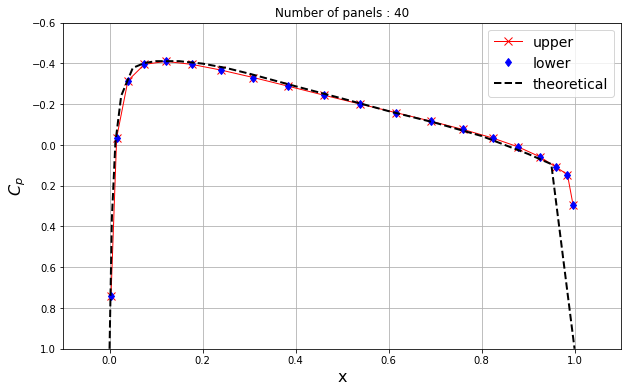

In [34]:
pyplot.figure(figsize=(10, 6))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
pyplot.plot([panel.xc for panel in panels if panel.loc == 'upper'],
            [panel.cp for panel in panels if panel.loc == 'upper'],
            label='upper',
            color='r', linewidth=1, marker='x', markersize=8)
pyplot.plot([panel.xc for panel in panels if panel.loc == 'lower'],
            [panel.cp for panel in panels if panel.loc == 'lower'],
            label='lower',
            color='b', linewidth=0, marker='d', markersize=6)
pyplot.plot(xtheo, 1-voverVsquared,
            label='theoretical',
            color='k', linestyle='--',linewidth=2)
pyplot.legend(loc='best', prop={'size':14})
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(1.0, -0.6)
pyplot.title('Number of panels : {}'.format(N));


In [35]:
def get_velocity_field(panels, freestream, X, Y):
    
    # freestream contribution
    u = freestream.u_inf * math.cos(freestream.alpha) * numpy.ones_like(X, dtype=float)
    v = freestream.u_inf * math.sin(freestream.alpha) * numpy.ones_like(X, dtype=float)
    # add the contribution from each source (superposition powers!!!)
    vec_intregral = numpy.vectorize(integral)
    for panel in panels:
        u += panel.sigma / (2.0 * math.pi) * vec_intregral(X, Y, panel, 1.0, 0.0)
        v += panel.sigma / (2.0 * math.pi) * vec_intregral(X, Y, panel, 0.0, 1.0)
    
    return u, v


/home/saksham/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


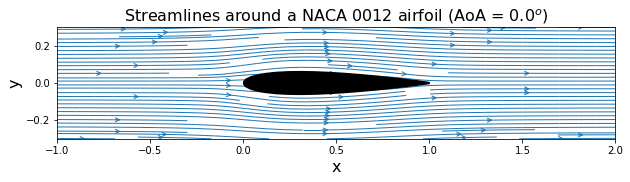

In [36]:
nx, ny = 20, 20  # number of points in the x and y directions
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.3, 0.3
X, Y = numpy.meshgrid(numpy.linspace(x_start, x_end, nx),
                      numpy.linspace(y_start, y_end, ny))

# compute the velocity field on the mesh grid
u, v = get_velocity_field(panels, freestream, X, Y)


width = 10
pyplot.figure(figsize=(width, width))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                  density=1, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.fill([panel.xc for panel in panels],
            [panel.yc for panel in panels],
            color='k', linestyle='solid', linewidth=2, zorder=2)
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Streamlines around a NACA 0012 airfoil (AoA = ${}^o$)'.format(alpha),
             fontsize=16);


/home/saksham/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


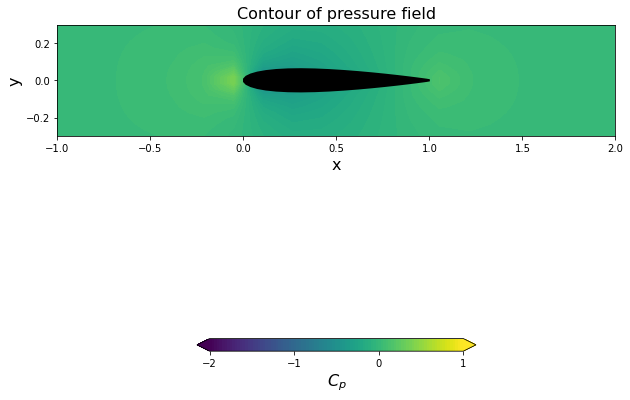

In [37]:
cp = 1.0 - (u**2 + v**2) / freestream.u_inf**2

# plot the pressure field
width = 10
pyplot.figure(figsize=(width, width))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf,
                       orientation='horizontal',
                       shrink=0.5, pad = 0.1,
                       ticks=[-2.0, -1.0, 0.0, 1.0])
cbar.set_label('$C_p$', fontsize=16)
pyplot.fill([panel.xc for panel in panels],
            [panel.yc for panel in panels],
            color='k', linestyle='solid', linewidth=2, zorder=2)
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Contour of pressure field', fontsize=16);
